# Question One 

This project is to extract data from "https://api.github.com/users/mbostock/repos" and then determine which date during the week has the most commit.

In [3]:
#import library and module
import requests
from datetime import datetime
from collections import Counter

url = "https://api.github.com/users/mbostock/repos" #repository link
json_data = requests.get(url).json() #parse json data

L = []
D = []

#get the date of commit from updated_at keys
for i in range(len(json_data)):
    date1 =  json_data[i]['created_at'][:-10] 
    date2 = json_data[i]['pushed_at'][:-10]
    date3 = json_data[i]['updated_at'][:-10]
    L.extend([date1, date2, date3])
    
L = [ x for x in L if "2016" in x ] #select last year data (2016)

#find the day of date in list L
for i in L:  
    d = datetime.strptime(i , '%Y-%m-%d')
    date = datetime.strftime(d,'%A')
    D.append(date)

    
#find the week with the greatest number of commit      
count = Counter(D)
MaxWeek = count.most_common()[0][0]
print ("The answer is " + str(MaxWeek))

The answer is Tuesday


# Question 2

Plot the data

In [2]:
#reorder the dictionary from Monday: Sunday
from collections import OrderedDict
dict_count = dict(count)
new_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
ordered_count = OrderedDict((k, dict_count[k]) for k in new_order)

#Convert Dictionary to Panda Dataframe
import pandas as pd
df = pd.DataFrame(list(ordered_count.items()), columns=['Day of Week', 'Commit_Frequency'])
df.set_index(["Day of Week"], inplace= True)
df

,Commit_Frequency
Day of Week,
Monday,8
Tuesday,10
Wednesday,3
Thursday,6
Friday,7
Sunday,9


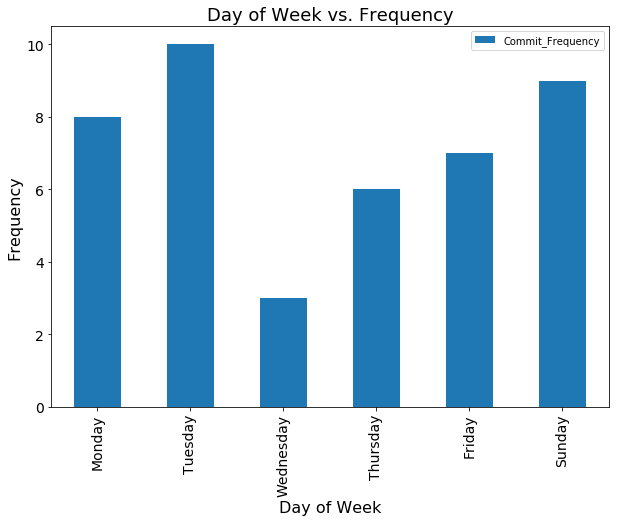

In [3]:
import matplotlib.pyplot as plt
ax = df['Commit_Frequency'].plot(kind='bar', figsize=(10,7), legend=True, fontsize=14)
ax.set_xlabel("Day of Week", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Day of Week vs. Frequency", fontsize=18)
plt.show()